## Imports

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Get data

In [72]:
df = pd.read_csv("../data/creditcard.csv") # import data
df['ClassName'] = df['Class'].map({0: 'Non Fraud', 1: 'Fraud'}) # add extra column for visualisation

## Fraud vs Non Fraud counts

In [73]:
df_class_count = df.groupby('ClassName').size().reset_index(name='Count') # create summary of Fraud vs Non Fraud counts 
df_class_count["Percentage"] = df_class_count["Count"]/df_class_count["Count"].sum()*100

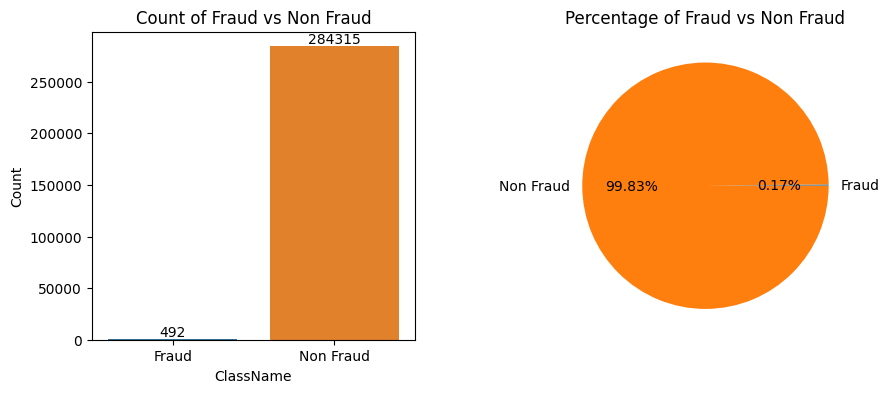

In [74]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Bar chart - Fraud vs Non Fraud (Count)
sns.barplot(x='ClassName', y='Count', data=df_class_count, ax=ax1)
for i, count in enumerate(df_class_count['Count']):
    ax1.text(i, count, str(count), ha='center', va='bottom')
ax1.set_title('Count of Fraud vs Non Fraud')

# Pie chart - Fraud vs Non Fraud (Percentage)
ax2.pie(df_class_count['Percentage'], labels=df_class_count['ClassName'], autopct='%1.2f%%')
ax2.set_title('Percentage of Fraud vs Non Fraud')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)

# Display the charts
plt.show()


## Time Density Plots

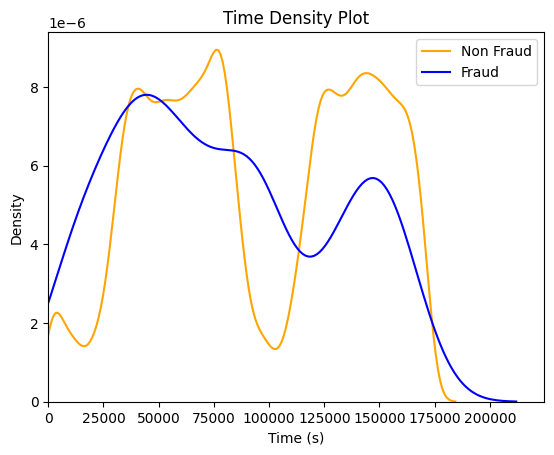

In [75]:
df_non_fraud = df[df["Class"] == 0]
df_fraud = df[df["Class"] == 1]

# Create the time density plot using seaborn
sns.kdeplot(data=df_non_fraud, x='Time', label='Non Fraud', color='Orange')
sns.kdeplot(data=df_fraud, x='Time', label='Fraud', color='Blue')

# Set the plot title and labels
plt.title('Time Density Plot')
plt.xlabel('Time (s)')
plt.ylabel('Density')
plt.xlim(left=0)
plt.legend(loc='upper right')

# Display the plot
plt.show()

In [77]:
df['Hour'] = df['Time'].apply(lambda x: np.floor(x / 3600))

df_hour_amount = df.groupby(['Hour', 'Class'])['Amount'].aggregate(['count', 'sum']).reset_index()
df_hour_amount = pd.DataFrame(df_hour_amount)
df_hour_amount.columns = ['Hour', 'Class', 'Transactions', 'Sum']
df_hour_amount.head()

,Hour,Class,Transactions,Sum
0,0.0,0,3961,256572.87
1,0.0,1,2,529.00
2,1.0,0,2215,145806.76
3,1.0,1,2,298.93
4,2.0,0,1555,106989.39


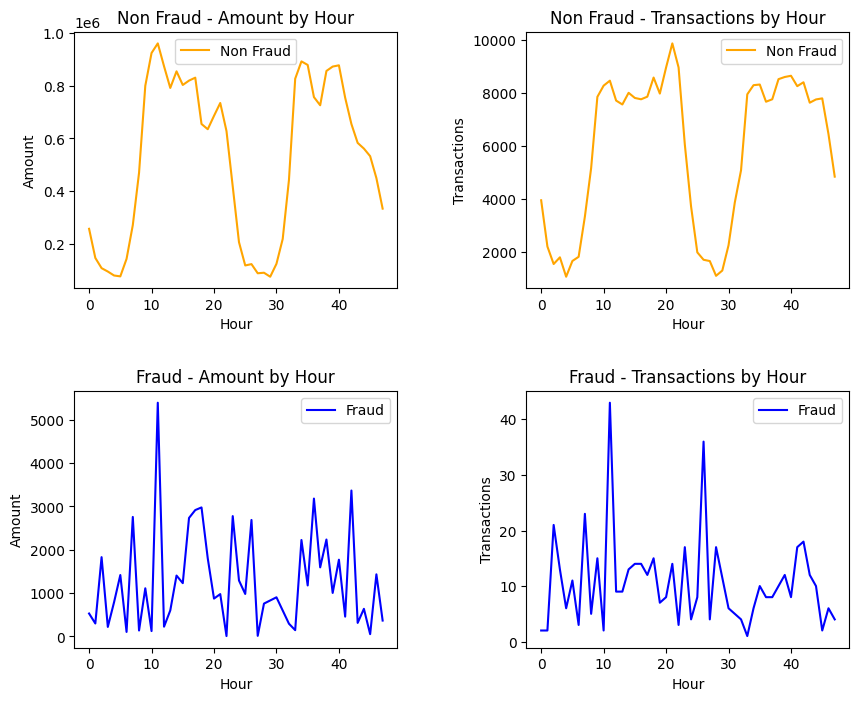

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(10, 8))

df_non_fraud = df_hour_amount[df_hour_amount["Class"] == 0]
df_fraud = df_hour_amount[df_hour_amount["Class"] == 1]

# Plotting amount by hour - Non Fraud
sns.lineplot(x='Hour', y='Sum', data=df_non_fraud, ax=ax1[0], label='Non Fraud', color='orange')
ax1[0].set_title('Non Fraud - Amount by Hour')
ax1[0].set_xlabel('Hour')
ax1[0].set_ylabel('Amount')

# Plotting transactions by hour - Non Fraud
sns.lineplot(x='Hour', y='Transactions', data=df_non_fraud, ax=ax1[1], label='Non Fraud', color='orange')
ax1[1].set_title('Non Fraud - Transactions by Hour')
ax1[1].set_xlabel('Hour')
ax1[1].set_ylabel('Transactions')

# Plotting amount by hour - Fraud
sns.lineplot(x='Hour', y='Sum', data=df_fraud, ax=ax2[0], label='Fraud', color='blue')
ax2[0].set_title('Fraud - Amount by Hour')
ax2[0].set_xlabel('Hour')
ax2[0].set_ylabel('Amount')

# Plotting transactions by hour - Fraud
sns.lineplot(x='Hour', y='Transactions', data=df_fraud, ax=ax2[1], label='Fraud', color='blue')
ax2[1].set_title('Fraud - Transactions by Hour')
ax2[1].set_xlabel('Hour')
ax2[1].set_ylabel('Transactions')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Display the plot
plt.show()
